# Weather

Open Meteo is a free and open-source weather data API that provides access to real-time and historical weather data for locations around the world. It offers a range of weather data, including temperature, humidity, wind speed, and precipitation.

In [1]:
import requests
import pandas as pd

# Ask user for latitude and longitude (e.g., Sydney is -33.891228, 151.19585)
latitude = input("Enter latitude: ")
longitude = input("Enter longitude: ")

# We construct a URL that is specific to the latitude and longitude the user inputted.
url = f'https://api.open-meteo.com/v1/forecast?latitude={latitude}&longitude={longitude}&current_weather=true&hourly=temperature_2m,relativehumidity_2m,windspeed_10m'
response = requests.get(url)    # We can then query this URL using a GET request
data = response.json()          # Format the response to json

current_weather = data['current_weather']
print(f'Weather information at {latitude},{longitude}')
pd.DataFrame.from_dict(current_weather, orient='index', columns=['values'])

Weather information at -33.8912,151.19


,values
time,2024-10-06T01:45
interval,900
temperature,25.1
windspeed,15.9
winddirection,267
is_day,1
weathercode,3


# yfinance

yfinance is a Python library that allows you to download financial data from Yahoo Finance. It provides a simple and convenient way to access historical stock prices, dividend data, and other financial data for publicly traded companies. With yfinance, you can easily download data for multiple stocks at once and perform analysis on the data using popular Python libraries like Pandas and Matplotlib.

In [4]:
import yfinance as yf
microsoft = yf.download(
    tickers = 'MSFT', 
    start='2022-08-03', 
    end='2023-08-10'
    )
microsoft




[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-03,276.760010,283.500000,276.609985,282.470001,277.094757,23518900
2022-08-04,281.799988,283.799988,280.170013,283.649994,278.252319,18098700
2022-08-05,279.149994,283.649994,278.679993,282.910004,277.526367,16774600
2022-08-08,284.049988,285.920013,279.320007,280.320007,274.985657,18739200
2022-08-09,279.640015,283.079987,277.609985,282.299988,276.927979,23405200
...,...,...,...,...,...,...
2023-08-03,326.000000,329.880005,325.950012,326.660004,323.541351,18253700
2023-08-04,331.880005,335.140015,327.239990,327.779999,324.650635,23727700
2023-08-07,328.369995,331.109985,327.519989,330.109985,326.958374,17741500


<Axes: xlabel='Date'>

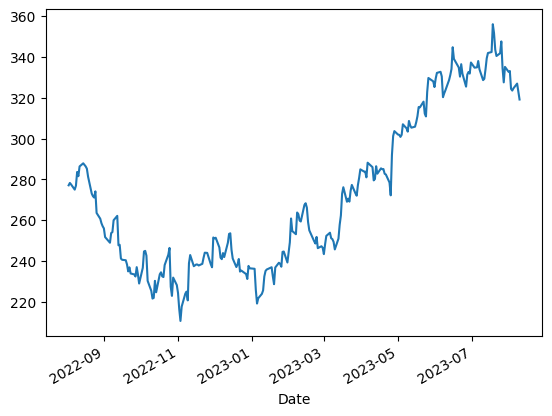

In [5]:
microsoft['Adj Close'].plot()

# News API

In [10]:
import requests

API_KEY = '624a9a3e85594ae99cd62b5379d12538' # FD's key
start = '2024-10-02'
end = '2024-10-02'
topic = 'apple'

# set response to the get request to the newsAPI asking for everything on the subjects of Apple
response = requests.get(f"https://newsapi.org/v2/everything?q={topic}&from={start}&to={end}&sortBy=popularity&apiKey={API_KEY}",timeout=10)

# print each title of the articles
for article in response.json()['articles']:
    print(article['title'])

# for each article in the response, use textblob to get the sentiment of the article
from textblob import TextBlob
for article in response.json()['articles']:
    print(TextBlob(article['title']).sentiment)

print("this is a test update")


OpenAI rakes in over $6 billion in new funding
Microsoft wants to know why some game developers aren’t on Xbox
Amazon Strikes for Prime Day with a Mind-Blowing iPad 9 Offer, 4x Cheaper Than the iPad Pro
The Next iPhone Could Arrive Early Next Year to Showcase Apple Intelligence on a Budget
Apple TV+ Is Bringing Back Sugar—Also, Why Is io9 Suddenly Talking About Sugar?
Ahead of Prime Day, Amazon Unleashes Record Low Price on 32″ Smart TV with Built-in Alexa
Sony’s Newest Wireless Earbuds Might Achieve the Snug Fit That the AirPods Couldn’t
iPad-like Echo Show 8 slashed by 43% on Amazon ahead of Prime Day
Keep Your Eyes on the Road and Hands on the Wheel With the Amazon Echo Auto for Over Half Off
Amazon is clearing its stock: Seize the best-selling AirPods Pro 2 at a massive discount before they vanish
Republicans Yassify JD Vance and Still Wonder Why People Call Them Weird
Your smartphone is more of a collaborative effort than you think
Google Messages on Wear OS could give watches tot

# Pandas read_html() function

Pandas provides a `read_html()` function that allows you to extract tables from HTML web pages and convert them into Pandas DataFrames. This function is particularly useful for web scraping tasks where you need to extract data from HTML tables on a web page. The `read_html()` function can automatically detect and parse HTML tables from a web page and return them as a list of DataFrames. You can then manipulate the DataFrames using Pandas to perform further analysis or export the data to other formats.

In [9]:
# For example, if we want to get a list of the tickers in the Nasdaq 100, 
# we can use the following code:
nasdaq = 'https://en.wikipedia.org/wiki/Nasdaq-100#Components'
data_table = pd.read_html(nasdaq)

# print out information about the data_table
print(f'Type: {type(data_table)}')
print(f'Length: {len(data_table)}')
print(f'Dimensions: {data_table[1].shape}')

data_table[4]

Type: <class 'list'>
Length: 18
Dimensions: (2, 3)


,Company,Ticker,GICS Sector,GICS Sub-Industry
0,Adobe Inc.,ADBE,Information Technology,Application Software
1,Advanced Micro Devices,AMD,Information Technology,Semiconductors
2,Airbnb,ABNB,Consumer Discretionary,"Hotels, Resorts & Cruise Lines"
3,Alphabet Inc. (Class A),GOOGL,Communication Services,Interactive Media & Services
4,Alphabet Inc. (Class C),GOOG,Communication Services,Interactive Media & Services
...,...,...,...,...
96,Vertex Pharmaceuticals,VRTX,Health Care,Biotechnology
97,Warner Bros. Discovery,WBD,Communication Services,Broadcasting
98,"Workday, Inc.",WDAY,Information Technology,Application Software
99,Xcel Energy,XEL,Utilities,Multi-Utilities
